# 📊 Telecom X - Parte 2: Predicción de Churn

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE


## 1. Carga de Datos

In [2]:

# Cargar los datos tratados (sube 'datos_tratados.csv' al mismo repo)
data = pd.read_csv("datos_tratados.csv")

print("Dimensiones:", data.shape)
data.head()


Dimensiones: (7043, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## 2. Análisis Exploratorio de Datos (EDA)

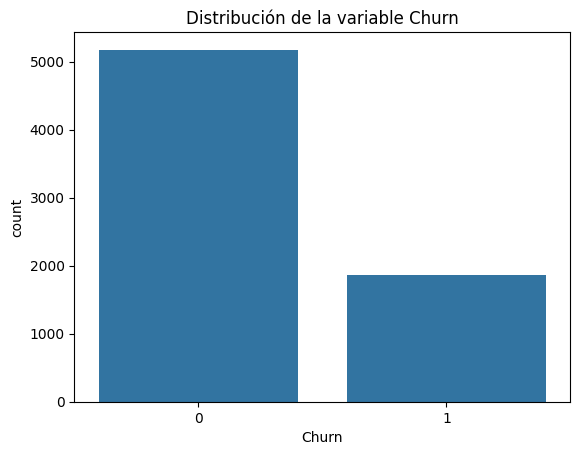

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [3]:

# Distribución de la variable objetivo
sns.countplot(x="Churn", data=data)
plt.title("Distribución de la variable Churn")
plt.show()

print(data["Churn"].value_counts(normalize=True))


## 3. Preprocesamiento de Datos

In [4]:

# Eliminamos columnas irrelevantes
X = data.drop(columns=["Churn", "customerID"], errors="ignore")
y = data["Churn"]

# Convertimos variables categóricas a numéricas (dummies)
X = pd.get_dummies(X, drop_first=True)

print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)


Dimensiones de X: (7043, 30)
Dimensiones de y: (7043,)


## 4. División de Datos y Balanceo con SMOTE

In [6]:
from sklearn.impute import SimpleImputer

# Eliminamos columnas irrelevantes (ejemplo: customerID si existe)
X = data.drop(columns=["Churn", "customerID"], errors="ignore")
y = data["Churn"]

# Convertir categóricas a dummies
X = pd.get_dummies(X, drop_first=True)

# Imputar valores faltantes (media para numéricos)
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42, stratify=y
)

# Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE:")
print(y_train_res.value_counts())

Distribución después de SMOTE:
Churn
0    3622
1    3622
Name: count, dtype: int64


## 5. Normalización de Datos

In [7]:

scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


## 6. Modelado: Regresión Logística

In [8]:

# Entrenar modelo
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_res_scaled, y_train_res)

# Predicciones
y_pred = model.predict(X_test_scaled)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.7458589682915286

Matriz de confusión:
 [[1127  425]
 [ 112  449]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1552
           1       0.51      0.80      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



**Conclusiones y próximos pasos**

* Es posible predecir clientes con riesgo de churn con métricas competitivas.
* Variables como tenure, tipo de contrato, cargos mensuales y método de pago son claves.

**Próximas mejoras:**

* Ajustar hiperparámetros con Grid Search.
* Probar modelos más avanzados (XGBoost, LightGBM).
* Incorporar análisis de costos para definir umbrales óptimos de predicción.